Luego del análisis, la siguiente tarea, que consiste en conocer mejor nuestra base de clientes, hemos decidido segmentar los clientes aplicando la técnica de clustering por comportamiento de compra, ya que pensamos que es la mejor manera de saber como aportan nuestros clientes al negocio en si, sobre todo teniendo en cuenta variables que hablen la fidelización que tienen con respecto a nosotros y también del valor monetario que nos aportan. 
Para analizar el comportamiento de compra generamos una serie de variables nuevas teniendo en cuenta los atributos por cliente que obtuvimos de la base de datos, algunos de los que mencionamos en la sección anterior (como revenue, productos, entry date,  etc), estas nuevas variables son:
-	rentabilidad por cliente
-	cantidad de productos en función de la familia de productos (servicios, ahorro e inversión y financiación). Los productos de servicio son cuentas: EM account PP, payroll account, EMC account, EM account P, EM account y debit card. Los de ahorro e inversión son: short term deposit, funds, securities, long term deposit y pension plan. Los productos de financiación son: loans (préstamos), mortgage (hipoteca) y credit card (tarjeta de crédito). 
-	cantidad de días desde la última compra (tiempo que pasó desde el último mes que tiene registrado una compra cada cliente hasta el último pk partition - fecha de registro de datos)


En este notebook se trabajo en la generación de las nuevas variables y por ultimo todos esos datos fueron procesados por un algoritmo de clasificación.


In [ ]:
# Aquí iria el codigo para conectarse a Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
# Importing
import sklearn
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ruta = '/content/drive/MyDrive/Capstone'

In [ ]:
#/content/drive/MyDrive/Nuclio/Capstone (1)/final_df1

In [ ]:
df = pd.read_pickle( ruta + '/' + 'final_df1')

In [ ]:
df.head(5)

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,...,country_id,region_code,age,salary,Population_region,Region_name,Population_country,Population_Roc,deseased,gender_H
0,15891,2018-07-28,0,0,0,0,0,0,0,0,...,ES,28.0,59,88654.65,6751251,Madrid,46754778,NaN,0,1
1,16203,2019-01-28,0,0,0,0,0,0,0,0,...,ES,8.0,70,88654.65,5714730,Barcelona,46754778,NaN,0,0
2,16203,2019-02-28,0,0,0,0,0,0,0,0,...,ES,8.0,70,88654.65,5714730,Barcelona,46754778,NaN,0,0
3,16203,2019-03-28,0,0,0,0,0,0,0,0,...,ES,8.0,70,88654.65,5714730,Barcelona,46754778,NaN,0,0
4,16203,2019-04-28,0,0,0,0,0,0,0,0,...,ES,8.0,70,88654.65,5714730,Barcelona,46754778,NaN,0,0


In [ ]:
print(df.isnull().sum().to_string())

pk_cid                                     0
pk_partition                               0
short_term_deposit                         0
loans                                      0
mortgage                                   0
funds                                      0
securities                                 0
long_term_deposit                          0
em_account_pp                              0
credit_card                                0
payroll                                    0
pension_plan                               0
payroll_account                            0
emc_account                                0
debit_card                                 0
em_account_p                               0
em_acount                                  0
debit_card_previous_month                  0
short_term_deposit_previous_month          0
dif_short_term_deposit                     0
loans_previous_month                       0
dif_loans                                  0
mortgage_p

In [ ]:
df.columns

Index(['pk_cid', 'pk_partition', 'short_term_deposit', 'loans', 'mortgage',
       'funds', 'securities', 'long_term_deposit', 'em_account_pp',
       'credit_card', 'payroll', 'pension_plan', 'payroll_account',
       'emc_account', 'debit_card', 'em_account_p', 'em_acount',
       'debit_card_previous_month', 'short_term_deposit_previous_month',
       'dif_short_term_deposit', 'loans_previous_month', 'dif_loans',
       'mortgage_previous_month', 'dif_mortgage', 'funds_previous_month',
       'dif_funds', 'securities_previous_month', 'dif_securities',
       'long_term_deposit_previous_month', 'dif_long_term_deposit',
       'em_account_pp_previous_month', 'dif_em_account_pp',
       'credit_card_previous_month', 'dif_credit_card',
       'pension_plan_previous_month', 'dif_pension_plan',
       'payroll_account_previous_month', 'dif_payroll_account',
       'emc_account_previous_month', 'dif_emc_account', 'dif_debit_card',
       'em_account_p_previous_month', 'dif_em_account_p',
 

In [ ]:
df.shape

(4841417, 78)

In [ ]:
#tenemos 350384 clientes con revenue 
df['pk_cid'].nunique()

350384

##Dias desde la ultima y la primera compra 

In [ ]:
#hago una lista con las columnas de dif_product

In [ ]:
lista_difproductos = ['dif_short_term_deposit', 'dif_loans', 'dif_mortgage',
       'dif_funds', 'dif_securities', 'dif_long_term_deposit', 'dif_em_account_pp',
       'dif_credit_card', 'dif_pension_plan', 'dif_payroll_account',
       'dif_emc_account', 'dif_debit_card', 'dif_em_account_p', 'dif_em_acount'] 

In [ ]:
#aca hago una variable filtro que es una lista vacía para tener los meses en los q el cliente SI compro (1)(pq hay meses en los que no),
#en el loop digo que para cada uno de los productos que esta en la lista_difproductos si el largo de la lista es 0, la lista filtro
# sera igual al i dentro del df que sea 1, y para cada i en la lista filtrada el filtro = a la fila que sea true

In [ ]:
filtro = []
for i in lista_difproductos:
 if len(filtro) == 0:
   #inicializo, cada fila compara y da una lista de true or false en cada fila donde la condicon se cumple

   filtro = df[i] == 1   
 else: 
 #todas las filas q tienen al menos un producto(porq no me interesa el producto sino que tenga al menos uno comprado), por eso pongo el or filtro
   filtro = (df[i] == 1) | filtro 
print(filtro)

0           True
1           True
2          False
3          False
4          False
           ...  
4841412     True
4841413     True
4841414     True
4841415     True
4841416     True
Length: 4841417, dtype: bool


In [ ]:
filtro #veo que es una serie de true y false

0           True
1           True
2          False
3          False
4          False
           ...  
4841412     True
4841413     True
4841414     True
4841415     True
4841416     True
Length: 4841417, dtype: bool

In [ ]:
#df lo filtro con las filas que tengo al menos un producto adquirido y luego pongo el max que me va a dar la ultima fecha
df[filtro][['pk_partition', 'pk_cid']].groupby('pk_cid').max()

,pk_partition
pk_cid,
15891,2018-07-28
16203,2019-01-28
16502,2019-01-28
17457,2019-05-28
17799,2018-01-28
...,...
1553456,2019-05-28
1553541,2019-05-28
1553559,2019-05-28


In [ ]:
df_purchase = df.copy()

In [ ]:
#aca resto la ultima fecha del pk_partition menos la ultima fecha del df filtrado, agrupado por pk_cid.
df_purchase = df['pk_partition'].max() - df[filtro][['pk_partition', 'pk_cid']].groupby('pk_cid').max()

In [ ]:
df_purchase.rename(columns = {'pk_partition': 'last_purchase'},inplace = True)

In [ ]:
df_purchase.head()

,last_purchase
pk_cid,
15891,304 days
16203,120 days
16502,120 days
17457,0 days
17799,485 days


In [ ]:
print(df.isnull().sum().to_string())

pk_cid                                     0
pk_partition                               0
short_term_deposit                         0
loans                                      0
mortgage                                   0
funds                                      0
securities                                 0
long_term_deposit                          0
em_account_pp                              0
credit_card                                0
payroll                                    0
pension_plan                               0
payroll_account                            0
emc_account                                0
debit_card                                 0
em_account_p                               0
em_acount                                  0
debit_card_previous_month                  0
short_term_deposit_previous_month          0
dif_short_term_deposit                     0
loans_previous_month                       0
dif_loans                                  0
mortgage_p

In [ ]:
df['dif_long_term_deposit'].isnull().sum()

0

In [ ]:
df_purchase['first_purchase'] = df['pk_partition'].max() - df[filtro][['pk_partition', 'pk_cid']].groupby('pk_cid').min()

In [ ]:
df_purchase.head()

,last_purchase,first_purchase
pk_cid,,
15891,304 days,304 days
16203,120 days,120 days
16502,120 days,212 days
17457,0 days,485 days
17799,485 days,485 days


In [ ]:
df_purchase.head(30)

,last_purchase,first_purchase
pk_cid,,
15891,304 days,304 days
16203,120 days,120 days
16502,120 days,212 days
17457,0 days,485 days
17799,485 days,485 days
17970,89 days,485 days
17980,365 days,365 days
18146,0 days,0 days
18704,485 days,485 days


###Suma revenue

In [ ]:
df_purchase['sum_revenue'] = df[['pk_cid', 'total_revenue']].groupby('pk_cid').sum()

In [ ]:
#tengo que sacar variables que me digan lo maximo, lo minimo y la media que me ingreso x cada cliente
#como hago?
#tengo una columna con los revenues totales de cada cliente de cada mes
#deberia solo hacer un group by de los clientes con la funcion de agregacion(max,min,mean) sobre el total revenue

In [ ]:
df['total_revenue'].head(30)

0     10
1     10
2     10
3     10
4     10
5     10
6     10
7     10
8     10
9     20
10    20
11    20
12    20
13    20
14    50
15    50
16    50
17    50
18    50
19    50
20    50
21    50
22    60
23    10
24    60
25    50
26    60
27    50
28    60
29    50
Name: total_revenue, dtype: int64

In [ ]:
df_purchase['max_revenue'] = df[['pk_cid', 'total_revenue']].groupby('pk_cid').max()

In [ ]:
df_purchase.head()

,last_purchase,first_purchase,sum_revenue,max_revenue
pk_cid,,,,
15891,304 days,304 days,10,10
16203,120 days,120 days,50,10
16502,120 days,212 days,130,20
17457,0 days,485 days,860,60
17799,485 days,485 days,170,10


##Min revenue

In [ ]:
df_purchase['min_revenue'] = df[['pk_cid', 'total_revenue']].groupby('pk_cid').min()

In [ ]:
df_purchase.head()

,last_purchase,first_purchase,sum_revenue,max_revenue,min_revenue
pk_cid,,,,,
15891,304 days,304 days,10,10,10
16203,120 days,120 days,50,10,10
16502,120 days,212 days,130,20,10
17457,0 days,485 days,860,60,10
17799,485 days,485 days,170,10,10


##Mean revenue

In [ ]:
df_purchase['mean_revenue'] = df[['pk_cid', 'total_revenue']].groupby('pk_cid').mean()

In [ ]:
df_purchase.tail()

,last_purchase,first_purchase,sum_revenue,max_revenue,min_revenue,mean_revenue
pk_cid,,,,,,
1553456,0 days,0 days,10,10,10,10.0
1553541,0 days,0 days,10,10,10,10.0
1553559,0 days,0 days,10,10,10,10.0
1553565,0 days,0 days,10,10,10,10.0
1553571,0 days,0 days,10,10,10,10.0


In [ ]:
#CREAR VARIABLE MAX/MIN DE TOTAL_PRODUCTOS, TOTAL_SERVICIOS_TOTAL_INV,TOTAL_FINANCIACION


#df_purchase['total_productos_max'] = df[['pk_cid', 'total_productos']].groupby('pk_cid').max()

In [ ]:
df_kmeans = pd.merge(df,df_purchase,how='left',on="pk_cid")

In [ ]:
df_kmeans['total_productos'] = df_kmeans['total_productos'].astype(int)
df_kmeans['total_servicios'] = df_kmeans['total_servicios'].astype(int)
df_kmeans['total_ahorro_inv'] = df_kmeans['total_ahorro_inv'].astype(int)
df_kmeans['total_fincanciacion'] = df_kmeans['total_fincanciacion'].astype(int)

In [ ]:
df_kmeans_productos=[]

In [ ]:
df_kmeans_productos = df_kmeans[['pk_cid', 'total_productos','total_servicios','total_ahorro_inv','total_fincanciacion']].groupby('pk_cid').max()

In [ ]:
df_kmeans_productos.rename(columns = {'total_productos':'total_productos_max','total_servicios':'total_servicios_max','total_ahorro_inv':'total_ahorro_inv_max','total_fincanciacion':'total_fincanciacion_max'}, inplace=True)

In [ ]:
df_kmeans_productos[[ 'total_productos_min','total_servicios_min','total_ahorro_inv_min','total_fincanciacion_min']] = df_kmeans[['pk_cid', 'total_productos','total_servicios','total_ahorro_inv','total_fincanciacion']].groupby('pk_cid').min()

In [ ]:
df_kmeans = df_kmeans.merge(df_kmeans_productos,how='left',on="pk_cid")

In [ ]:
df_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4841417 entries, 0 to 4841416
Data columns (total 92 columns):
 #   Column                             Dtype          
---  ------                             -----          
 0   pk_cid                             int64          
 1   pk_partition                       datetime64[ns] 
 2   short_term_deposit                 category       
 3   loans                              category       
 4   mortgage                           category       
 5   funds                              category       
 6   securities                         category       
 7   long_term_deposit                  category       
 8   em_account_pp                      category       
 9   credit_card                        category       
 10  payroll                            category       
 11  pension_plan                       category       
 12  payroll_account                    category       
 13  emc_account                        categor

In [ ]:
df_kmeans.head(20)

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,...,min_revenue,mean_revenue,total_productos_max,total_servicios_max,total_ahorro_inv_max,total_fincanciacion_max,total_productos_min,total_servicios_min,total_ahorro_inv_min,total_fincanciacion_min
0,15891,2018-07-28,0,0,0,0,0,0,0,0,...,10,10.000000,1,1,0,0,1,1,0,0
1,16203,2019-01-28,0,0,0,0,0,0,0,0,...,10,10.000000,1,1,0,0,1,1,0,0
2,16203,2019-02-28,0,0,0,0,0,0,0,0,...,10,10.000000,1,1,0,0,1,1,0,0
3,16203,2019-03-28,0,0,0,0,0,0,0,0,...,10,10.000000,1,1,0,0,1,1,0,0
4,16203,2019-04-28,0,0,0,0,0,0,0,0,...,10,10.000000,1,1,0,0,1,1,0,0
5,16203,2019-05-28,0,0,0,0,0,0,0,0,...,10,10.000000,1,1,0,0,1,1,0,0
6,16502,2018-10-28,0,0,0,0,0,0,0,0,...,10,16.250000,2,2,0,0,1,1,0,0
7,16502,2018-11-28,0,0,0,0,0,0,0,0,...,10,16.250000,2,2,0,0,1,1,0,0
8,16502,2018-12-28,0,0,0,0,0,0,0,0,...,10,16.250000,2,2,0,0,1,1,0,0
9,16502,2019-01-28,0,0,0,0,0,0,0,0,...,10,16.250000,2,2,0,0,1,1,0,0


In [ ]:
# Creamos variable que refleja desde cuando es cliente

df_kmeans['client_since'] = df_kmeans['pk_partition'].max() - df_kmeans['entry_date']

In [ ]:
print(df_kmeans.isnull().sum().to_string())

pk_cid                                     0
pk_partition                               0
short_term_deposit                         0
loans                                      0
mortgage                                   0
funds                                      0
securities                                 0
long_term_deposit                          0
em_account_pp                              0
credit_card                                0
payroll                                    0
pension_plan                               0
payroll_account                            0
emc_account                                0
debit_card                                 0
em_account_p                               0
em_acount                                  0
debit_card_previous_month                  0
short_term_deposit_previous_month          0
dif_short_term_deposit                     0
loans_previous_month                       0
dif_loans                                  0
mortgage_p

In [ ]:
df_kmeans.head(20)

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,...,mean_revenue,total_productos_max,total_servicios_max,total_ahorro_inv_max,total_fincanciacion_max,total_productos_min,total_servicios_min,total_ahorro_inv_min,total_fincanciacion_min,client_since
0,15891,2018-07-28,0,0,0,0,0,0,0,0,...,10.000000,1,1,0,0,1,1,0,0,304 days
1,16203,2019-01-28,0,0,0,0,0,0,0,0,...,10.000000,1,1,0,0,1,1,0,0,156 days
2,16203,2019-02-28,0,0,0,0,0,0,0,0,...,10.000000,1,1,0,0,1,1,0,0,156 days
3,16203,2019-03-28,0,0,0,0,0,0,0,0,...,10.000000,1,1,0,0,1,1,0,0,156 days
4,16203,2019-04-28,0,0,0,0,0,0,0,0,...,10.000000,1,1,0,0,1,1,0,0,156 days
5,16203,2019-05-28,0,0,0,0,0,0,0,0,...,10.000000,1,1,0,0,1,1,0,0,156 days
6,16502,2018-10-28,0,0,0,0,0,0,0,0,...,16.250000,2,2,0,0,1,1,0,0,240 days
7,16502,2018-11-28,0,0,0,0,0,0,0,0,...,16.250000,2,2,0,0,1,1,0,0,240 days
8,16502,2018-12-28,0,0,0,0,0,0,0,0,...,16.250000,2,2,0,0,1,1,0,0,240 days
9,16502,2019-01-28,0,0,0,0,0,0,0,0,...,16.250000,2,2,0,0,1,1,0,0,240 days


In [ ]:
df_kmeans.columns

Index(['pk_cid', 'pk_partition', 'short_term_deposit', 'loans', 'mortgage',
       'funds', 'securities', 'long_term_deposit', 'em_account_pp',
       'credit_card', 'payroll', 'pension_plan', 'payroll_account',
       'emc_account', 'debit_card', 'em_account_p', 'em_acount',
       'debit_card_previous_month', 'short_term_deposit_previous_month',
       'dif_short_term_deposit', 'loans_previous_month', 'dif_loans',
       'mortgage_previous_month', 'dif_mortgage', 'funds_previous_month',
       'dif_funds', 'securities_previous_month', 'dif_securities',
       'long_term_deposit_previous_month', 'dif_long_term_deposit',
       'em_account_pp_previous_month', 'dif_em_account_pp',
       'credit_card_previous_month', 'dif_credit_card',
       'pension_plan_previous_month', 'dif_pension_plan',
       'payroll_account_previous_month', 'dif_payroll_account',
       'emc_account_previous_month', 'dif_emc_account', 'dif_debit_card',
       'em_account_p_previous_month', 'dif_em_account_p',
 

In [ ]:
colums_delete = ['pk_partition', 'short_term_deposit', 'loans', 'mortgage',
       'funds', 'securities', 'long_term_deposit', 'em_account_pp',
       'credit_card', 'payroll', 'pension_plan', 'payroll_account',
       'emc_account', 'debit_card', 'em_account_p', 'em_acount',
       'debit_card_previous_month', 'short_term_deposit_previous_month',
       'dif_short_term_deposit', 'loans_previous_month', 'dif_loans',
       'mortgage_previous_month', 'dif_mortgage', 'funds_previous_month',
       'dif_funds', 'securities_previous_month', 'dif_securities',
       'long_term_deposit_previous_month', 'dif_long_term_deposit',
       'em_account_pp_previous_month', 'dif_em_account_pp',
       'credit_card_previous_month', 'dif_credit_card',
       'pension_plan_previous_month', 'dif_pension_plan',
       'payroll_account_previous_month', 'dif_payroll_account',
       'emc_account_previous_month', 'dif_emc_account', 'dif_debit_card',
       'em_account_p_previous_month', 'dif_em_account_p',
       'em_acount_previous_month', 'dif_em_acount', 'total_revenue',
       'revenue_short_term_deposit', 'revenue_loans', 'revenue_mortgage',
       'revenue_funds', 'revenue_securities', 'revenue_long_term_deposit',
       'revenue_em_account_pp', 'revenue_credit_card', 'revenue_pension_plan',
       'revenue_payroll_account', 'revenue_emc_account', 'revenue_debit_card',
       'revenue_em_account_p', 'revenue_em_acount', 'total_productos',
       'total_servicios', 'total_ahorro_inv', 'total_fincanciacion',
       'entry_date', 'entry_channel', 'active_customer', 'segment',
       'country_id', 'region_code', 'age', 'salary', 'Population_region',
       'Region_name', 'Population_country', 'Population_Roc', 'deseased',
       'gender_H', 'first_purchase', 'total_productos_max',
       'max_revenue', 'min_revenue', 'mean_revenue', 'total_productos_min', 'total_servicios_min',
       'total_ahorro_inv_min', 'total_fincanciacion_min',]

In [ ]:
df_kmeans.drop(colums_delete, axis=1, inplace=True)

In [ ]:
print(df_kmeans.isnull().sum().to_string())

pk_cid                     0
last_purchase              0
sum_revenue                0
total_servicios_max        0
total_ahorro_inv_max       0
total_fincanciacion_max    0
client_since               0


In [ ]:
df_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4841417 entries, 0 to 4841416
Data columns (total 7 columns):
 #   Column                   Dtype          
---  ------                   -----          
 0   pk_cid                   int64          
 1   last_purchase            timedelta64[ns]
 2   sum_revenue              int64          
 3   total_servicios_max      int64          
 4   total_ahorro_inv_max     int64          
 5   total_fincanciacion_max  int64          
 6   client_since             timedelta64[ns]
dtypes: int64(5), timedelta64[ns](2)
memory usage: 295.5 MB


In [ ]:
df_kmeans["last_purchase"] = df_kmeans["last_purchase"].dt.days
df_kmeans["client_since"] = df_kmeans["client_since"].dt.days

In [ ]:
df_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4841417 entries, 0 to 4841416
Data columns (total 7 columns):
 #   Column                   Dtype
---  ------                   -----
 0   pk_cid                   int64
 1   last_purchase            int64
 2   sum_revenue              int64
 3   total_servicios_max      int64
 4   total_ahorro_inv_max     int64
 5   total_fincanciacion_max  int64
 6   client_since             int64
dtypes: int64(7)
memory usage: 295.5 MB


In [ ]:
"""df_kmeans['total_productos'] = df_kmeans['total_productos'].astype(int)

df_kmeans['total_servicios'] = df_kmeans['total_servicios'].astype(int)
df_kmeans['total_ahorro_inv'] = df_kmeans['total_ahorro_inv'].astype(int)
df_kmeans['total_fincanciacion'] = df_kmeans['total_fincanciacion'].astype(int)"""

"df_kmeans['total_productos'] = df_kmeans['total_productos'].astype(int)\n\ndf_kmeans['total_servicios'] = df_kmeans['total_servicios'].astype(int)\ndf_kmeans['total_ahorro_inv'] = df_kmeans['total_ahorro_inv'].astype(int)\ndf_kmeans['total_fincanciacion'] = df_kmeans['total_fincanciacion'].astype(int)"

In [ ]:
df_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4841417 entries, 0 to 4841416
Data columns (total 7 columns):
 #   Column                   Dtype
---  ------                   -----
 0   pk_cid                   int64
 1   last_purchase            int64
 2   sum_revenue              int64
 3   total_servicios_max      int64
 4   total_ahorro_inv_max     int64
 5   total_fincanciacion_max  int64
 6   client_since             int64
dtypes: int64(7)
memory usage: 295.5 MB


In [ ]:
df_kmeans['pk_cid'].nunique()

350384

In [ ]:
len(df_kmeans['pk_cid'])

4841417

In [ ]:
df_kmeans_without_duplicated = df_kmeans[~df_kmeans['pk_cid'].duplicated(keep='first')]

In [ ]:
#REVISAMOS QUE NUESTRO DF NO TIENE DUPLICADOS (A REVISAR PASOS ANTERIORES)
df_kmeans_without_duplicated.nunique()

pk_cid                     350384
last_purchase                  17
sum_revenue                   316
total_servicios_max             5
total_ahorro_inv_max            5
total_fincanciacion_max         3
client_since                 1414
dtype: int64

In [ ]:
df_kmeans_without_duplicated.describe().T

,count,mean,std,min,25%,50%,75%,max
pk_cid,350384.0,1.264228e+06,175633.102488,15891.0,1135706.75,1273153.0,1411405.25,1553571.0
last_purchase,350384.0,3.446922e+02,169.484358,0.0,212.00,485.0,485.00,485.0
sum_revenue,350384.0,2.150579e+02,241.559105,10.0,110.00,170.0,170.00,4180.0
total_servicios_max,350384.0,1.237128e+00,0.502080,0.0,1.00,1.0,1.00,4.0
total_ahorro_inv_max,350384.0,1.283192e-01,0.357582,0.0,0.00,0.0,0.00,4.0
total_fincanciacion_max,350384.0,2.453879e-02,0.155359,0.0,0.00,0.0,0.00,2.0
client_since,350384.0,7.550101e+02,429.790696,-3.0,309.00,673.0,1045.00,1608.0


In [ ]:
#puedo ver los outliers con el boxplot, en esta gráfica estan representados dentro del box todos los valores que se encuentran entre el cuartil (q1)25 y (Q3)75%, los que queden fuera del “maximum”: Q3 + 1.5*IQR
#“minimum”: Q1 -1.5*IQR son outliers
#o los que queden por fuera del cuantil X como hace nico, decir que son outliers para esa columna
#analizar por columna

In [ ]:
 # Load the dataset
#bos_hou = load_boston()
 
# Create the dataframe
#column_name = bos_hou.feature_names
#df_boston = pd.DataFrame(bos_hou.data)
#df_boston.columns = column_name
#df_boston.head()
 
#''' Detection '''
# IQR
Q1 = np.percentile(df_kmeans_without_duplicated['sum_revenue'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_kmeans_without_duplicated['sum_revenue'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df_kmeans_without_duplicated.shape)
 

Old Shape:  (350384, 7)


In [ ]:
# Upper bound
upper = np.where(df_kmeans_without_duplicated['sum_revenue'] >= (Q3+1.5*IQR))

In [ ]:
df_kmeans_without_duplicated[df_kmeans_without_duplicated['sum_revenue'] >= (Q3+1.5*IQR)]

,pk_cid,last_purchase,sum_revenue,total_servicios_max,total_ahorro_inv_max,total_fincanciacion_max,client_since
14,17457,0,860,2,1,0,619
48,17970,89,1350,3,2,0,1503
65,17980,365,1040,0,2,0,389
96,19021,0,540,0,0,1,959
122,19684,485,850,1,1,0,823
...,...,...,...,...,...,...,...
4821378,1532025,0,380,3,1,1,104
4822351,1532551,61,310,2,2,0,101
4824213,1533671,30,330,2,1,1,95
4825704,1534617,30,290,2,2,0,92


In [ ]:
# Lower bound
lower = np.where(df_kmeans_without_duplicated['sum_revenue'] <= (Q1-1.5*IQR))

In [ ]:
df_kmeans_without_duplicated[(df_kmeans_without_duplicated['sum_revenue'] <= (Q1-1.5*IQR))]

,pk_cid,last_purchase,sum_revenue,total_servicios_max,total_ahorro_inv_max,total_fincanciacion_max,client_since
0,15891,304,10,1,0,0,304
78,18146,0,10,1,0,0,94
681,33941,120,10,1,0,0,861
719,35843,0,10,1,0,0,0
1075,44956,30,10,1,0,0,38
...,...,...,...,...,...,...,...
4841412,1553456,0,10,1,0,0,-2
4841413,1553541,0,10,1,0,0,-3
4841414,1553559,0,10,1,0,0,-3
4841415,1553565,0,10,1,0,0,-3


In [ ]:

 
#''' Removing the Outliers '''
#df_kmeans_without_duplicated.drop(upper[0], inplace = True)
#df_kmeans_without_duplicated.drop(lower[0], inplace = True)
 
#print("New Shape: ", df_kmeans_without_duplicated.shape)

### Los outliers de 'last_purchase' se encuentran en los <= 18 dias



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


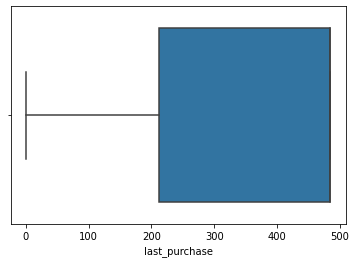

In [ ]:
sns.boxplot(df_kmeans_without_duplicated["last_purchase"])

### Los outliers de 'sum_revenue' se encuentran por debajo de los 18 eur y por encima de los 25 eur

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


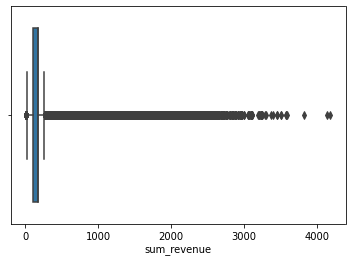

In [ ]:
sns.boxplot(df_kmeans_without_duplicated["sum_revenue"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


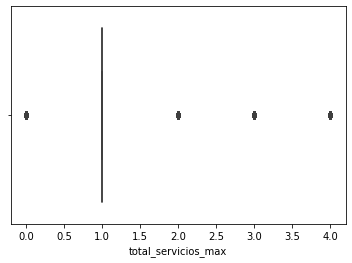

In [ ]:
sns.boxplot(df_kmeans_without_duplicated["total_servicios_max"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


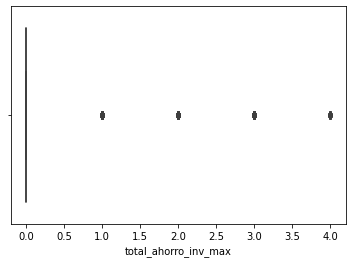

In [ ]:
sns.boxplot(df_kmeans_without_duplicated["total_ahorro_inv_max"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


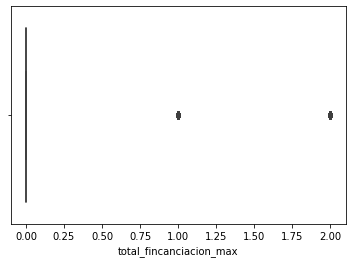

In [ ]:
sns.boxplot(df_kmeans_without_duplicated["total_fincanciacion_max"])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


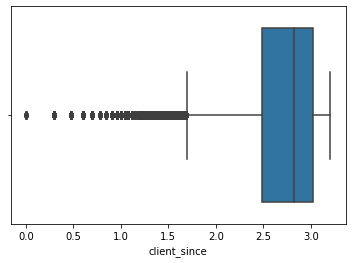

In [ ]:
sns.boxplot(x=np.log10(df_kmeans_without_duplicated["client_since"]))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

 
edades = np.array(df_kmeans_without_duplicated['total_productos_max'])
edad_unique, counts = np.unique(edades, return_counts=True)
 
sizes = counts*100
colors = ['blue']*len(edad_unique)
colors[-1] = 'red'
 
plt.axhline(1, color='k', linestyle='--')
plt.scatter(edad_unique, np.ones(len(edad_unique)), s=sizes, color=colors)
plt.yticks([])
plt.show()

KeyError: ignored

In [ ]:
correlaciones = df_kmeans_without_duplicated.corr()

In [ ]:
correlaciones.style.background_gradient(cmap='coolwarm')

,pk_cid,last_purchase,sum_revenue,total_servicios_max,total_ahorro_inv_max,total_fincanciacion_max,client_since
pk_cid,1.000000,-0.463787,-0.273085,-0.056487,-0.051206,-0.108027,-0.876177
last_purchase,-0.463787,1.000000,-0.121392,-0.433083,-0.339892,-0.177743,0.529865
sum_revenue,-0.273085,-0.121392,1.000000,0.542957,0.695431,0.596165,0.263078
total_servicios_max,-0.056487,-0.433083,0.542957,1.000000,0.388079,0.269372,0.058617
total_ahorro_inv_max,-0.051206,-0.339892,0.695431,0.388079,1.000000,0.245605,0.011536
total_fincanciacion_max,-0.108027,-0.177743,0.596165,0.269372,0.245605,1.000000,0.084296
client_since,-0.876177,0.529865,0.263078,0.058617,0.011536,0.084296,1.000000


In [ ]:
#FALTA REVISAR TEMA DE OUTLIERS

standard_scaler = StandardScaler()
scaled_df = standard_scaler.fit_transform(df_kmeans_without_duplicated)
scaled_df = pd.DataFrame(scaled_df, index = df_kmeans_without_duplicated.index, columns = df_kmeans_without_duplicated.columns)

In [ ]:
cluster_model = KMeans(n_clusters = 7)
cluster_model.fit(scaled_df)

KMeans(n_clusters=7)

In [ ]:
labels = cluster_model.predict(scaled_df)

In [ ]:
df_kmeans_without_duplicated["cluster"] = labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_kmeans_without_duplicated.shape

(350384, 8)

In [ ]:
#TARDA MUCHO
#selected_columns = ['last_purchase', 'sum_revenue', 'total_servicios_max','total_ahorro_inv_max','total_fincanciacion_max','client_since']
#sns.pairplot(df_kmeans_without_duplicated, vars = selected_columns, hue = 'cluster')

In [ ]:
ficha_df = pd.DataFrame()
ficha_df

""


In [ ]:
for i, col in enumerate(['sum_revenue','total_servicios_max','total_ahorro_inv_max','total_fincanciacion_max','last_purchase','client_since']):
    resumen_data = df_kmeans_without_duplicated[["cluster", col]].groupby("cluster").describe().T[1:]
    ficha_df = ficha_df.append(resumen_data)

In [ ]:
resumen_data

cluster                     0            1            2            3  \
client_since mean   235.20813  1265.151029   985.355420   740.582246   
             std    100.01793   176.402969   392.570813   170.085864   
             min     -3.00000    -2.000000    21.000000   140.000000   
             25%    196.00000  1096.000000   700.250000   602.000000   
             50%    240.00000  1320.000000  1017.000000   669.000000   
             75%    294.00000  1390.000000  1318.000000   941.000000   
             max   1033.00000  1607.000000  1608.000000  1054.000000   

cluster                      4            5            6  
client_since mean   494.208116  1010.555688   818.241391  
             std    295.870844   327.424097   344.277234  
             min      4.000000    60.000000     7.000000  
             25%    270.000000   751.000000   567.000000  
             50%    445.000000  1012.000000   780.000000  
             75%    626.000000  1300.000000  1039.000000  
             max   1607.000000  1607.000000  1607.000000

In [ ]:
# generamos nuestro multiindex
out_index = [
    'Monetarios',
    'Monetarios',
    'Monetarios',
    'Monetarios',
    'Fidelizacion', 
    'Fidelizacion'   
]

inner_index = [
    'sum_revenue',
    'total_servicios_max',
    'total_ahorro_inv_max',
    'total_fincanciacion_max',
    'last_purchase',
    'client_since'
]

estadisticos = ["Media", "Desviación", "Mínimo", "Perc. 25", "Perc. 50", "Perc. 75", "Máximo"]

new_multi_index = []

for oi, ii, in zip(out_index, inner_index):
    for es in estadisticos:
        new_multi_index.append((oi, ii, es))
        
new_multi_index

[('Monetarios', 'sum_revenue', 'Media'),
 ('Monetarios', 'sum_revenue', 'Desviación'),
 ('Monetarios', 'sum_revenue', 'Mínimo'),
 ('Monetarios', 'sum_revenue', 'Perc. 25'),
 ('Monetarios', 'sum_revenue', 'Perc. 50'),
 ('Monetarios', 'sum_revenue', 'Perc. 75'),
 ('Monetarios', 'sum_revenue', 'Máximo'),
 ('Monetarios', 'total_servicios_max', 'Media'),
 ('Monetarios', 'total_servicios_max', 'Desviación'),
 ('Monetarios', 'total_servicios_max', 'Mínimo'),
 ('Monetarios', 'total_servicios_max', 'Perc. 25'),
 ('Monetarios', 'total_servicios_max', 'Perc. 50'),
 ('Monetarios', 'total_servicios_max', 'Perc. 75'),
 ('Monetarios', 'total_servicios_max', 'Máximo'),
 ('Monetarios', 'total_ahorro_inv_max', 'Media'),
 ('Monetarios', 'total_ahorro_inv_max', 'Desviación'),
 ('Monetarios', 'total_ahorro_inv_max', 'Mínimo'),
 ('Monetarios', 'total_ahorro_inv_max', 'Perc. 25'),
 ('Monetarios', 'total_ahorro_inv_max', 'Perc. 50'),
 ('Monetarios', 'total_ahorro_inv_max', 'Perc. 75'),
 ('Monetarios', 'total_

In [ ]:
def generate_multiindex(list_of_tuples, names):
    return pd.MultiIndex.from_tuples(list_of_tuples, names = names)

In [ ]:
#aqui hay que fijarnos en los tamaños de los clusters, cuantos clientes hay por cluster en donde dice Tamaño (si son muy pocos el dice que no sirve)
#tambien fijarnos en aquellos grupos que tienen valores similares y fijarnos en las diferencias entre ellos para describirlos mejor.
#ver en donde tiene mas peso cada cluster, lo que est en azul oscuro nos va a decir eso, por ejemplo los mas antiguos, los que mas productos tienen, etc.

In [ ]:
names = ["Grupo Indicadores", "Indicador", "Estadístico"]
index_ficha = generate_multiindex(new_multi_index, names)
ficha_df.set_index(index_ficha, inplace = True)

In [ ]:
tamaño_clusters = df_kmeans_without_duplicated.groupby("cluster").size().to_frame().T
tamaño_clusters.set_index(generate_multiindex([("General", "Clúster", "Tamaño")] , names), inplace = True)

In [ ]:
ficha_df = tamaño_clusters.append(ficha_df)

In [ ]:
ficha_df.style.background_gradient(cmap = 'Blues', axis = 1)

Descripción clusters:
0. Se caracteriza por tener la última compra realizada hace más tiempo, es decir, son un cluster inactivo.  Además, son los clientes con mayor antigüedad.  Además, tienen bastantes productos de servicios y algunos de financiación en comparación al resto de los clusters (TOP 4)

1. Se caracteriza por tener una media bastante alta de productos de financiación  y algo tiene de servicios. 
2. Se caracteriza por ser los que generan más revenues,  tienen más productos de servicios y de financiación y también de inversiones (junto con otros)  y tienen una media relativamente alta de antigüedad (TOP 1) 
3. Se caracterizan porque son de los que tienen su última compra con mayor antigüedad, es decir, inactivos. 
4. Se caracterizan porque son los terceros con media de revenue más alta,  tienen muchos productos de inversión y bastantes productos de servicios (TOP 3) 
5. Se caracterizan por tener muchos productos de servicios (y una maxima alta de antigüedad de clientes) (TOP 4) 
6. Se caracteriza por ser los segundos que más revenue generan,  los que tienen media más alta de productos de inversión  y de las más altas de servicios, con una media bastante alta de antigüedad de clientes. (TOP 2)


In [ ]:
df_kmeans_without_duplicated['client_since'].plot(kind='hist',bins=100)

In [ ]:
df_kmeans_without_duplicated['first_purchase'].plot(kind='hist',bins=100)

In [ ]:
df_kmeans_without_duplicated['max_revenue'].plot(kind='hist',bins=100)